In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from gridstatus import EIA
from dotenv import load_dotenv
import UCSmpl
import tsam.timeseriesaggregation as tsam
pd.options.display.max_columns = None

# load the environment variables
load_dotenv()

True

In [2]:
# initialize the EIA api
eia = EIA()

In [3]:
data_route = 'electricity/rto/region-data'
demand_dataset = eia.get_dataset(data_route,
                          start="2018-01-01",
                          end="2024-01-01",
                          facets={'respondent':'MISO',
                                  'type':['D']},
                          n_workers=4,
                          verbose=True).reset_index(drop=True)

Fetching data from https://api.eia.gov/v2/electricity/rto/region-data/data/
Params: {'start': '2018-01-01T00', 'end': '2024-01-01T00', 'frequency': 'hourly', 'data': ['value'], 'facets': {'respondent': ['MISO'], 'type': ['D']}, 'offset': 0, 'length': 5000, 'sort': [{'column': 'period', 'direction': 'asc'}, {'column': 'respondent', 'direction': 'asc'}, {'column': 'type', 'direction': 'asc'}]}
Concurrent workers: 4
Total records: 52585
Total pages: 11
Fetching data:


100%|███████████████████████████████████████████| 11/11 [00:02<00:00,  3.85it/s]


In [4]:
miso = demand_dataset.set_index('Interval End').drop(columns=['Interval Start', 'Respondent','Respondent Name'])

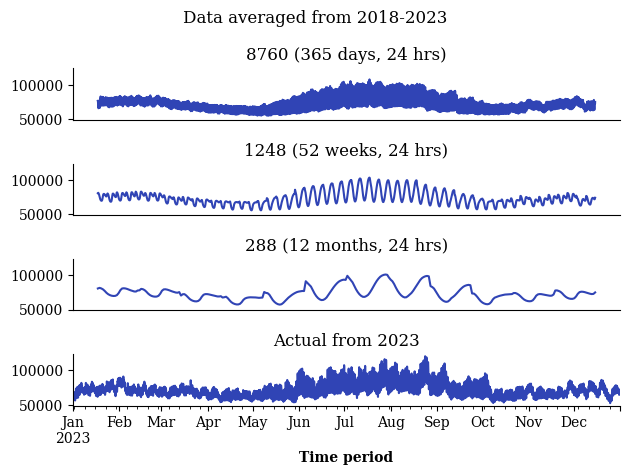

In [9]:
import UCSmpl

with plt.style.context('ucs_light'):

    fig, ax = plt.subplots(4,1, sharey=True)
    miso[miso.index.year==2023][['Load']].plot(ax=ax[3], legend=False)
    miso.pivot_table(index=[miso.index.day_of_year,miso.index.hour]).plot(ax=ax[0], legend=False)
    miso.pivot_table(index=[miso.index.isocalendar().week,miso.index.hour]).plot(ax=ax[1], legend=False)
    miso.pivot_table(index=[miso.index.month,miso.index.hour]).plot(ax=ax[2], legend=False)
    # ax[2].tick_params(axis='x',rotation=45)
    # ax[0].set_ylabel('Demand [MW]')
    plt.suptitle("Data averaged from 2018-2023")
    ax[0].set_title('8760 (365 days, 24 hrs)')
    ax[1].set_title(f'{int(52*24)} (52 weeks, 24 hrs)')
    ax[2].set_title(f'{int(12*24)} (12 months, 24 hrs)')
    ax[3].set_title("Actual from 2023")

    ax[0].set_xticks([])
    ax[1].set_xticks([])
    ax[2].set_xticks([])
    ax[0].set_xlabel('')
    ax[1].set_xlabel('')
    ax[2].set_xlabel('')
    ax[3].set_xlabel('Time period')

    plt.tight_layout()
    plt.show()